In [1]:
import pandas as pd


In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt


In [4]:
%matplotlib inline


In [5]:
import requests

In [8]:
#series - built on numpy

s= pd.Series(np.random.randn(4), name='daily returns')
s


0   -0.625458
1    0.996415
2   -0.072872
3   -0.164456
Name: daily returns, dtype: float64

In [9]:
#to describe series
s.describe()

count    4.000000
mean     0.033407
std      0.686035
min     -0.625458
25%     -0.279707
50%     -0.118664
75%      0.194450
max      0.996415
Name: daily returns, dtype: float64

In [18]:
#dataframe has multiple columns
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-source-py/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [20]:
#can treat columns as strings
df[['country','year']]

,country,year
0,Argentina,2000
1,Australia,2000
2,India,2000
3,Israel,2000
4,Malawi,2000
5,South Africa,2000
6,United States,2000
7,Uruguay,2000


In [21]:
#can cut rows and columns at the same time 
df.iloc[0:3,1:2]

,country isocode
0,ARG
1,AUS
2,IND


In [22]:
#can set index as country list
df = df.set_index('country')
df

,country isocode,year,POP,XRAT,tcgdp,cc,cg
country,,,,,,,
Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [27]:
#change names of columns

df.columns = 'country isocode', 'year','population','XRAT', 'total GDP','cc','cg'
df

,country isocode,year,population,XRAT,total GDP,cc,cg
country,,,,,,,
Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [29]:
#change population in thousands to single units

df['population']= df['population']*1e3
df

,country isocode,year,population,XRAT,total GDP,cc,cg
country,,,,,,,
Argentina,ARG,2000,3.733565e+07,0.999500,2.950722e+05,75.716805,5.578804
Australia,AUS,2000,1.905319e+07,1.724830,5.418047e+05,67.759026,6.720098
India,IND,2000,1.006300e+09,44.941600,1.728144e+06,64.575551,14.072206
Israel,ISR,2000,6.114570e+06,4.077330,1.292539e+05,64.436451,10.266688
Malawi,MWI,2000,1.180150e+07,59.543808,5.026222e+03,74.707624,11.658954
South Africa,ZAF,2000,4.506410e+07,6.939830,2.272424e+05,72.718710,5.726546
United States,USA,2000,2.821720e+08,1.000000,9.898700e+06,72.347054,6.032454
Uruguay,URY,2000,3.219793e+06,12.099592,2.525596e+04,78.978740,5.108068


In [31]:
#add column of GDP per capita
df['GDP per capita']= df['total GDP']*1e6/df['population']
df                                         

,country isocode,year,population,XRAT,total GDP,cc,cg,GDP per capita
country,,,,,,,,
Argentina,ARG,2000,3.733565e+07,0.999500,2.950722e+05,75.716805,5.578804,7903.229085
Australia,AUS,2000,1.905319e+07,1.724830,5.418047e+05,67.759026,6.720098,28436.433261
India,IND,2000,1.006300e+09,44.941600,1.728144e+06,64.575551,14.072206,1717.324719
Israel,ISR,2000,6.114570e+06,4.077330,1.292539e+05,64.436451,10.266688,21138.672749
Malawi,MWI,2000,1.180150e+07,59.543808,5.026222e+03,74.707624,11.658954,425.896679
South Africa,ZAF,2000,4.506410e+07,6.939830,2.272424e+05,72.718710,5.726546,5042.647686
United States,USA,2000,2.821720e+08,1.000000,9.898700e+06,72.347054,6.032454,35080.381854
Uruguay,URY,2000,3.219793e+06,12.099592,2.525596e+04,78.978740,5.108068,7843.970620


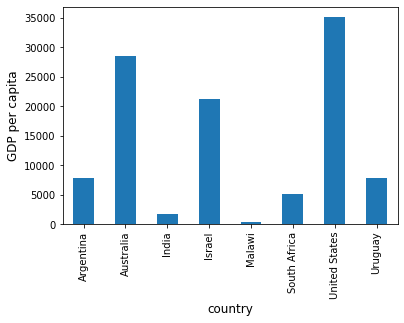

In [34]:
#generate bar plot

bar_plot = df['GDP per capita'].plot(kind='bar')
bar_plot.set_xlabel('country', fontsize =12)
bar_plot.set_ylabel('GDP per capita', fontsize =12)
bar_plot

In [38]:
df = df.sort_values(by='GDP per capita', ascending=False)
df

,country isocode,year,population,XRAT,total GDP,cc,cg,GDP per capita
country,,,,,,,,
United States,USA,2000,2.821720e+08,1.000000,9.898700e+06,72.347054,6.032454,35080.381854
Australia,AUS,2000,1.905319e+07,1.724830,5.418047e+05,67.759026,6.720098,28436.433261
Israel,ISR,2000,6.114570e+06,4.077330,1.292539e+05,64.436451,10.266688,21138.672749
Argentina,ARG,2000,3.733565e+07,0.999500,2.950722e+05,75.716805,5.578804,7903.229085
Uruguay,URY,2000,3.219793e+06,12.099592,2.525596e+04,78.978740,5.108068,7843.970620
South Africa,ZAF,2000,4.506410e+07,6.939830,2.272424e+05,72.718710,5.726546,5042.647686
India,IND,2000,1.006300e+09,44.941600,1.728144e+06,64.575551,14.072206,1717.324719
Malawi,MWI,2000,1.180150e+07,59.543808,5.026222e+03,74.707624,11.658954,425.896679


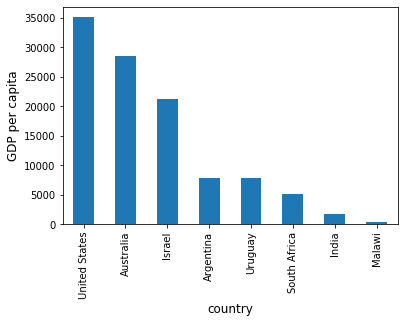

In [39]:

bar_plot = df['GDP per capita'].plot(kind='bar')
bar_plot.set_xlabel('country', fontsize =12)
bar_plot.set_ylabel('GDP per capita', fontsize =12)
bar_plot

In [40]:
#using requests to access data from fred
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')


In [70]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [71]:
#check source
source[1]

'1948-01-01,3.4\r'

In [72]:
source[2]

'1948-02-01,3.8\r'

In [73]:
#sort by date 
#pd.read... is standard for creating tables
#create dataframe 'data'
data = pd.read_csv(url, index_col=0, parse_dates=True)
type(data)

pandas.core.frame.DataFrame

In [74]:
data.head()

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [75]:

pd.set_option('precision', 1)
data.describe()

,VALUE
count,866.0
mean,5.7
std,1.6
min,2.5
25%,4.5
50%,5.5
75%,6.8
max,10.8


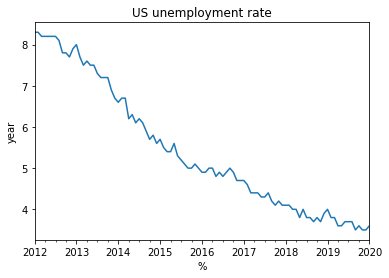

In [86]:
#can plot from 2012 to 2020
ax = data['2012-01-01':'2020-01-07'].plot(title = 'US unemployment rate', legend=False)
ax.set_xlabel('%')
ax.set_ylabel('year')
ax

In [93]:
#world bank data
from pandas_datareader import wb
govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2012, end=2013).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind


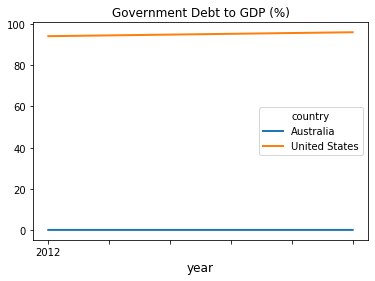

In [96]:
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()

In [97]:

import datetime as dt

In [99]:
from pandas_datareader import data

In [103]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

In [104]:
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

INTC    27.1
MSFT    56.0
IBM     16.3
BHP     14.3
TM      20.9
SNE     39.6
PTR    -17.4
dtype: float64


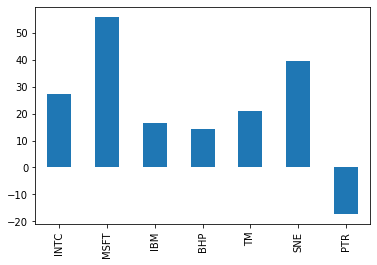

In [109]:
p1 = ticker.iloc[0]
p2 = ticker.iloc[-1]
change = 100*(p2-p1)/p1
print (change)
change.plot(kind='bar')

'<!DOCTYPE html>\r'